# Camera Intrinsics & Extrinsics, 3D to 2D projection

- For a ready to use function, see in helpers.py
- A link to how we calculate the [intrinsic](https://codeyarns.com/tech/2015-09-08-how-to-compute-intrinsic-camera-matrix-for-a-camera.html) and [extrinsic](https://ksimek.github.io/2012/08/22/extrinsic) matrices
- To read more about our modalities, see here - https://docs.datagen.tech/en/latest/Modalities/Where%20to%20find.html?highlight=extrinsic#camera-level-modalities

## Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import datagen
from dghelpers import imshow

## Creation of a Dataset container

In [2]:
DATASET_PATH= '../resources/faces_1'
dp = datagen.load(DATASET_PATH)[4]

## Projection

Say we have 3D points in the modalities. Let's take for example the Standard 3D keypoints. <br>
The points are given in world coordinates. <br>
How to project them to the image plane? 

Let's visualize the 3D keypoints

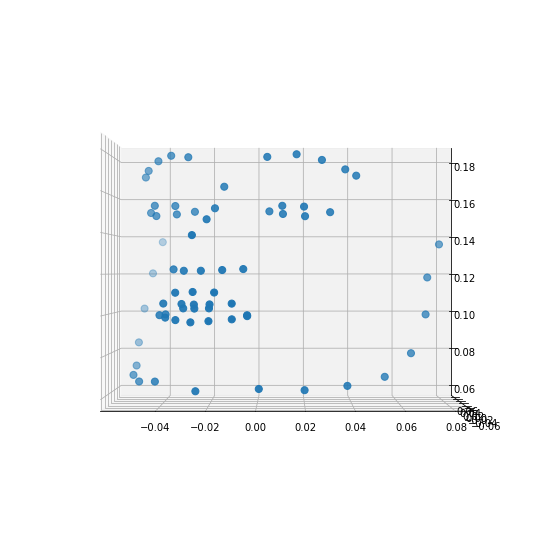

In [3]:
kpts_3d = dp.keypoints.face.standard.coords_3d

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(projection='3d')

ax.scatter(*kpts_3d.T, s=50)
ax.view_init(elev=0, azim=-90)

The 3D points are obviously not in image coordinates. <br>
Let's perform the required transformation! <br> <br>
First convert the points to homogeneous coordinates (68 x 3 -> 68 x 4)

In [4]:
kpts_3d_homogeneous = np.hstack([kpts_3d, np.ones((68,1))])

Multiply it by the extrinsic matrix (3 x 4) to get 3D camera coordinates (68 x 4 -> 68 x 3)

In [5]:
kpts_3d_cam = (dp.camera_metadata.extrinsic_matrix @ kpts_3d_homogeneous.T).T

Multiply it by the intrinsic matrix (3 x 3) to get 2D image plane coordinates (homogeneous) (68 x 3 -> 68 x 3)

In [6]:
kpts_2d_img_homogenous = (dp.camera_metadata.intrinsic_matrix @ kpts_3d_cam.T).T

Convert 2D homogeneous coordinates to 2D regular coordinates (68 x 3 -> 68 x 2)

In [7]:
kpts_2d_img = kpts_2d_img_homogenous[:, :2] / kpts_2d_img_homogenous[:, 2][:, np.newaxis]

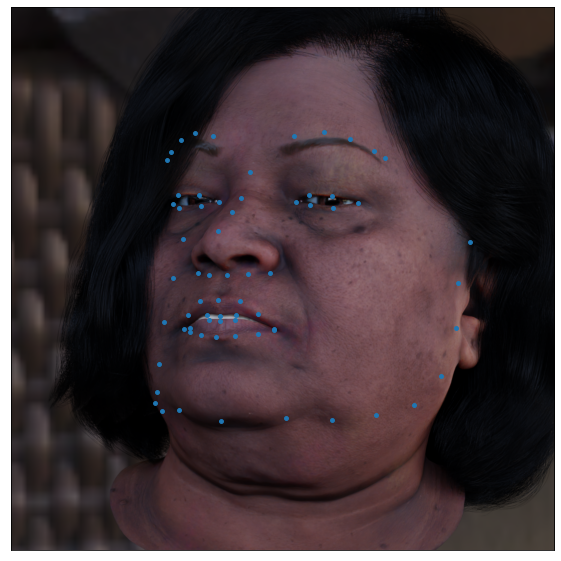

In [8]:
imshow(dp.visible_spectrum)
plt.scatter(*kpts_2d_img.T, s=15)